# Bike Sharing Data Exploration
## by Joana

## Preliminary Wrangling

> This document explores a dataset containing information for 3036496 rides of a bike sharing system in the San Francisco Bay Area

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import geopy
from geopy import distance
from sklearn.neighbors import DistanceMetric

%matplotlib inline

In [117]:
df = pd.read_csv('bike_share_data')

C:\Anacondapython\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Show all the text for all variables in dataframe
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [157]:
dfs.to_csv('bike_share_data.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036496 entries, 0 to 3036495
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 347.5+ MB


In [5]:
#Make copy of dataframe
df_copy = df.copy()

In [6]:
#Converting integers to string
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

In [7]:
#Converting object to datetime
df['start_time']= pd.to_datetime(df['start_time']) 
df['end_time']= pd.to_datetime(df['end_time']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036496 entries, 0 to 3036495
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(8)
memory usage: 347.5+ MB


In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,53588,2019-03-31 20:59:21.878,2019-04-01 11:52:30.200,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,No,NaN
1,74305,2019-03-31 13:56:46.005,2019-04-01 10:35:11.454,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,No,NaN
2,79789,2019-03-31 11:48:34.201,2019-04-01 09:58:23.824,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,345.0,Hubbell St at 16th St,37.766483,-122.398279,2317,Customer,No,NaN
3,59315,2019-03-31 16:48:54.374,2019-04-01 09:17:30.154,92.0,Mission Bay Kids Park,37.772301,-122.393028,49.0,S Park St at 3rd St,37.780760,-122.394989,6631,Customer,No,NaN
4,47886,2019-03-31 19:54:24.148,2019-04-01 09:12:30.817,339.0,Jackson St at 11th St,37.800002,-122.266438,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,5241,Subscriber,No,NaN


In [9]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
3036491,61,2020-04-01 10:42:35,2020-04-01 10:43:37,nan,NaN,37.848493,-122.265797,nan,NaN,37.848476,-122.265779,999960,Subscriber,NaN,app
3036492,78,2020-03-18 17:10:42,2020-03-18 17:12:01,nan,NaN,37.848499,-122.265794,nan,NaN,37.848477,-122.265815,999960,Subscriber,NaN,app
3036493,122,2020-04-01 13:32:28,2020-04-01 13:34:31,nan,NaN,37.848507,-122.266010,nan,NaN,37.848485,-122.266063,633095,Subscriber,NaN,app
3036494,340,2020-04-01 13:07:34,2020-04-01 13:13:14,nan,NaN,37.848530,-122.266013,nan,NaN,37.848497,-122.266029,633095,Subscriber,NaN,app
3036495,333,2020-03-23 16:39:57,2020-03-23 16:45:30,nan,NaN,37.848625,-122.266660,nan,NaN,37.848446,-122.266022,633095,Subscriber,NaN,app


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036496 entries, 0 to 3036495
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(8)
memory usage: 347.5+ MB


In [11]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,3.036496e+06,3.036496e+06,3.036496e+06,3.036496e+06,3.036496e+06
mean,8.159040e+02,3.775906e+01,-1.223513e+02,3.775821e+01,-1.223474e+02
std,1.913268e+03,1.730132e-01,4.490454e-01,2.606699e-01,7.751218e-01
min,6.000000e+01,0.000000e+00,-1.225143e+02,0.000000e+00,-1.225758e+02
25%,3.670000e+02,3.776750e+01,-1.224163e+02,3.776835e+01,-1.224143e+02
50%,5.840000e+02,3.777877e+01,-1.223997e+02,3.777922e+01,-1.223991e+02
75%,9.100000e+02,3.779429e+01,-1.223889e+02,3.779500e+01,-1.223889e+02
max,9.121100e+05,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00


### What is the structure of your dataset?

> This dataset contains information about 3036496 rides between April 2019 and March 2020. 
     For each **ride** it has information about: 
         - its duration  
         - start time  
         - end time. 
     >It also has information about the **start and end stations**: 
         - id 
         - name 
         - latitude 
         - longitude. 
     >Finally, it also has information regarding the **bike id, the type of user, whether the user used other means of transports during their trip other than bike or not, and the rental access method**. 
      
>So, in total, for each ride we have **15** features. 
      
      
      
### What is/are the main feature(s) of interest in your dataset? 
      
>I'm interested in discovering patterns in bike utilization and number of rides, considering, for example, time of the day, distance, locations (most crowded  stations), user type, etc.
      
### What features in the dataset do you think will help support your investigation into your feature(s) of interest? 
      
>Duration and start time might be helful to understand trends in bike utilization - is there a lot of demand on a specific time of the day (for example, during the rush hour)? 
      
>Latitude and Longitude will be helpful to analyse distances. 
      
>Stations' names will be helpful to understand if bike utilization is particularly high in specific areas.   
      
>As this is a bike sharing service, I expect the bikes to be used mostly during short periods of time, mainly during rush hour and in areas with high affluence of people (city centre...) 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

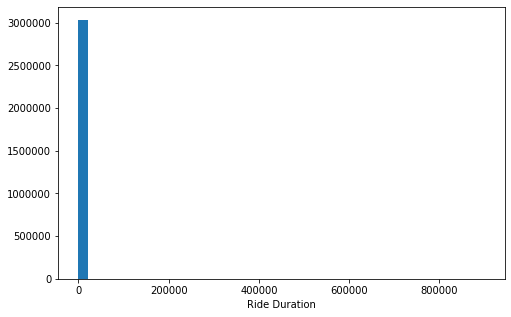

In [12]:
# Standard-scaled plot
bins = np.arange(0, df['duration_sec'].max()+1000, 20000)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Ride Duration')
plt.ylabel('Number of Rides')
plt.show()

> Clearly this interval is not appropriate to plot the data because of extreme values. Let's try to get a better idea of the distribution of ride duration by zooming in the scale

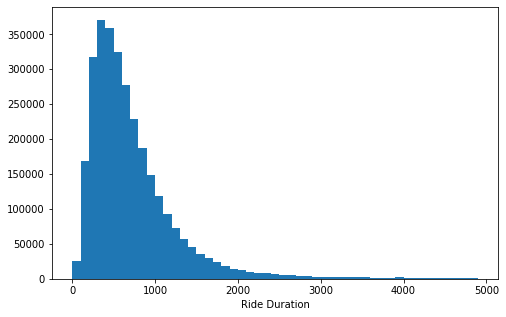

In [13]:
# Standard-scaled plot - adjusted scale (excluding very long ride durations!)
bins = np.arange(0, 5000, 100)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Ride Duration')
plt.ylabel('Number of Rides')
plt.show()

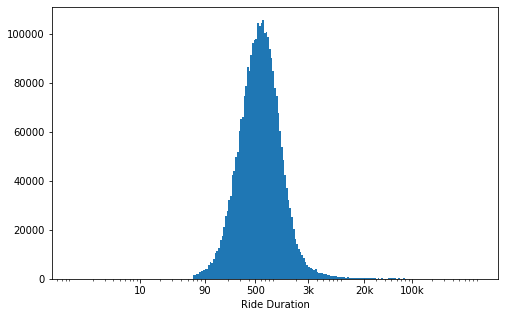

In [14]:
# There's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10, 90, 500, 3000, 20000, 100000], [10, 90, 500, '3k', '20k', '100k'])
plt.xlabel('Ride Duration')
plt.ylabel('Number of Rides')
plt.show()

In [15]:
#Let's create a table with seconds converted to hours so that it's easier to interpret 
df['duration_hour'] = df['duration_sec'].div(360)

In [16]:
df.duration_hour.max()

2533.6388888888887

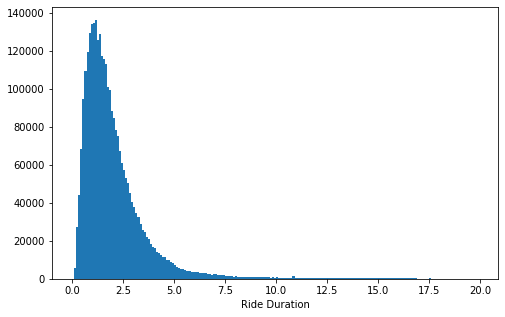

In [17]:
# Standard-scaled plot - adjusted scale (excluding very long ride durations!)
bins = np.arange(0, 20, 0.1)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_hour', bins = bins)
plt.xlabel('Ride Duration')
plt.ylabel('Number of Rides')
plt.show()

Ride duration has a long-tailed distribution, with a lot of rides with shorter durations, and few with longer durations. When plotted on a log-scale, the price distribution looks unimodal, with one peak between around 500 seconds (~1.5h)

Next up, I'll look at some other informations that this dataset gives us.

In [18]:
df.user_type.value_counts().nlargest(5)

Subscriber    2233586
Customer       802910
Name: user_type, dtype: int64

In [19]:
df.start_station_name.value_counts().nlargest(10)

Market St at 10th St                                         44977
Berry St at 4th St                                           43337
San Francisco Caltrain (Townsend St at 4th St)               41908
San Francisco Ferry Building (Harry Bridges Plaza)           37914
Montgomery St BART Station (Market St at 2nd St)             34464
Powell St BART Station (Market St at 4th St)                 33294
Howard St at Beale St                                        31707
Powell St BART Station (Market St at 5th St)                 30327
San Francisco Caltrain Station 2  (Townsend St at 4th St)    29257
Steuart St at Market St                                      28119
Name: start_station_name, dtype: int64

In [20]:
df.end_station_name.value_counts().nlargest(10)

San Francisco Caltrain (Townsend St at 4th St)               57994
Montgomery St BART Station (Market St at 2nd St)             48375
San Francisco Ferry Building (Harry Bridges Plaza)           47783
Market St at 10th St                                         44134
Berry St at 4th St                                           43472
San Francisco Caltrain Station 2  (Townsend St at 4th St)    42045
Powell St BART Station (Market St at 4th St)                 36976
Powell St BART Station (Market St at 5th St)                 31410
The Embarcadero at Sansome St                                30953
Howard St at Beale St                                        30168
Name: end_station_name, dtype: int64

In [21]:
df.groupby(["start_station_name", "end_station_name"]).size().sort_values(ascending=False).head(10)

start_station_name                                  end_station_name                                  
Berry St at 4th St                                  San Francisco Ferry Building (Harry Bridges Plaza)    4697
San Francisco Ferry Building (Harry Bridges Plaza)  The Embarcadero at Sansome St                         4617
Bryant St at 2nd St                                 Montgomery St BART Station (Market St at 2nd St)      3675
Grand Ave at Perkins St                             19th Street BART Station                              3516
The Embarcadero at Sansome St                       Steuart St at Market St                               3264
19th Street BART Station                            Grand Ave at Perkins St                               3261
The Embarcadero at Sansome St                       San Francisco Ferry Building (Harry Bridges Plaza)    3116
San Francisco Ferry Building (Harry Bridges Plaza)  Berry St at 4th St                                    3099
2nd St at

In [22]:
df.duration_sec.nlargest(20)

2105782    912110
2252657    811077
2478961     86317
2518473     86239
2010043     86230
2181415     86221
890173      86217
268966      86114
1366477     86114
2195166     85994
789807      85952
1814656     85935
797444      85904
1373782     85702
134643      85676
1640895     85545
2072532     85523
326382      85496
1264975     85492
869345      85457
Name: duration_sec, dtype: int64

In [23]:
df.rental_access_method.unique()

array([nan, 'app', 'clipper'], dtype=object)

In [24]:
df.user_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036496 entries, 0 to 3036495
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
 15  duration_hour            float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(8)
memory usage: 370.

In [49]:
#Get day of week (Monday=0), month and time of the day (hour)
df['year'] = df['start_time'].dt.year
df['month'] = df['start_time'].dt.month
df['day_week'] = (df['start_time']).dt.weekday
df['hour'] = df['start_time'].dt.hour

df['day_week_end'] = (df['end_time']).dt.weekday
df['hour_end'] = df['end_time'].dt.hour
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_hour,year,month,day_week,hour,distance,month_end,day_week_end,hour_end
0,53588,2019-03-31 20:59:21.878,2019-04-01 11:52:30.200,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,No,NaN,148.855556,2019,3,6,20,0.000000,4,0,11
1,74305,2019-03-31 13:56:46.005,2019-04-01 10:35:11.454,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,No,NaN,206.402778,2019,3,6,13,6.386122,4,0,10
2,79789,2019-03-31 11:48:34.201,2019-04-01 09:58:23.824,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,345.0,Hubbell St at 16th St,37.766483,-122.398279,2317,Customer,No,NaN,221.636111,2019,3,6,11,2.283763,4,0,9
3,59315,2019-03-31 16:48:54.374,2019-04-01 09:17:30.154,92.0,Mission Bay Kids Park,37.772301,-122.393028,49.0,S Park St at 3rd St,37.780760,-122.394989,6631,Customer,No,NaN,164.763889,2019,3,6,16,0.954710,4,0,9
4,47886,2019-03-31 19:54:24.148,2019-04-01 09:12:30.817,339.0,Jackson St at 11th St,37.800002,-122.266438,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,5241,Subscriber,No,NaN,133.016667,2019,3,6,19,5.601333,4,0,9


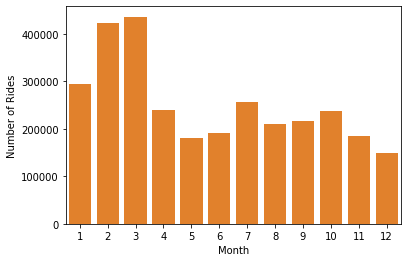

In [128]:
# Standard bar plot
base_color1 = sb.color_palette()[1] 
sb.countplot(data = df, x= "month", color=base_color1);
plt.xlabel('Month')
plt.ylabel('Number of Rides');

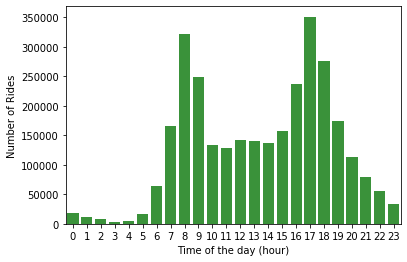

In [127]:
base_color2 = sb.color_palette()[2] 
sb.countplot(data = df, x= "hour", color=base_color2);
plt.xlabel('Time of the day (hour)')
plt.ylabel('Number of Rides');

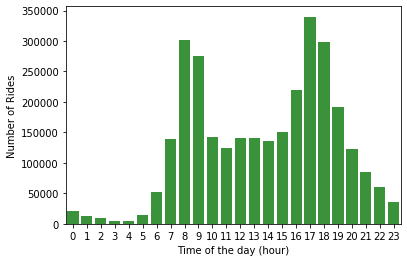

In [129]:
sb.countplot(data = df, x= "hour_end", color=base_color2);
plt.xlabel('Time of the day (hour)')
plt.ylabel('Number of Rides');

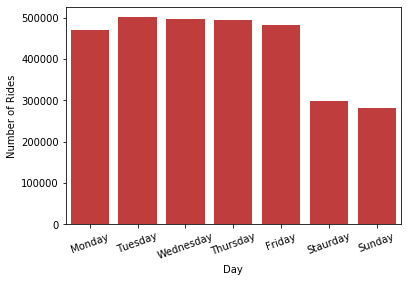

In [130]:
base_color3 = sb.color_palette()[3] 
sb.countplot(data = df, x= "day_week", color=base_color3);
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Staurday', 'Sunday'], rotation=20) ;

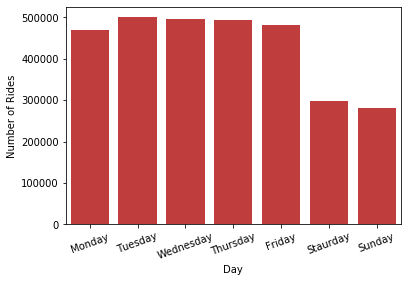

In [131]:
sb.countplot(data = df, x= "day_week_end", color=base_color3);
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Staurday', 'Sunday'], rotation=20) ;

In [30]:
#Get distance between the start and end stations
def distancer(row):
    coords_1 = (row['start_station_latitude'], row['start_station_longitude'])
    coords_2 = (row['end_station_latitude'], row['end_station_longitude'])
    return geopy.distance.distance(coords_1, coords_2).kilometers

df['distance'] = df.apply(distancer, axis=1)

In [42]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_hour,year,month,day_week,hour,distance
0,53588,2019-03-31 20:59:21.878,2019-04-01 11:52:30.200,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,No,NaN,148.855556,2019,3,6,20,0.000000
1,74305,2019-03-31 13:56:46.005,2019-04-01 10:35:11.454,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,No,NaN,206.402778,2019,3,6,13,6.386122
2,79789,2019-03-31 11:48:34.201,2019-04-01 09:58:23.824,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,345.0,Hubbell St at 16th St,37.766483,-122.398279,2317,Customer,No,NaN,221.636111,2019,3,6,11,2.283763
3,59315,2019-03-31 16:48:54.374,2019-04-01 09:17:30.154,92.0,Mission Bay Kids Park,37.772301,-122.393028,49.0,S Park St at 3rd St,37.780760,-122.394989,6631,Customer,No,NaN,164.763889,2019,3,6,16,0.954710
4,47886,2019-03-31 19:54:24.148,2019-04-01 09:12:30.817,339.0,Jackson St at 11th St,37.800002,-122.266438,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,5241,Subscriber,No,NaN,133.016667,2019,3,6,19,5.601333


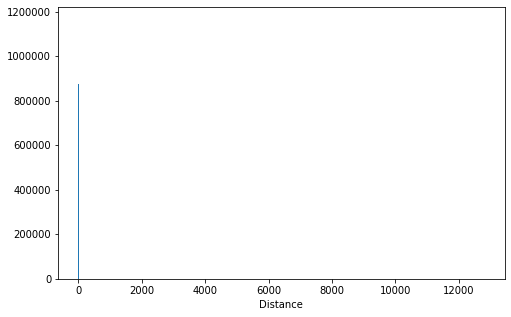

In [31]:
# Standard-scaled plot
bins = np.arange(0, df['distance'].max()+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'distance', bins = bins)
plt.ylabel('Number of Rides')
plt.xlabel('Distance')
plt.show()

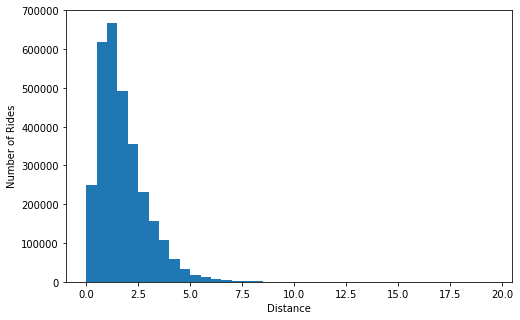

In [123]:
#There seem to be some outliers - let's zoom in the distance
bins = np.arange(0, 20, 0.5)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'distance', bins = bins)
plt.xlabel('Distance (km)')
plt.ylabel('Number of Rides')
plt.show()

In [34]:
df.sort_values('distance', ascending=False).head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_hour,year,month,day_week,hour,distance
1804953,66037,2019-11-25 16:40:51.382,2019-11-26 11:01:28.665,485.0,Funston Ave at Fulton St,37.773263,-122.471230,449.0,16th Depot Bike Fleet Station,0.0,0.0,12577,Customer,No,NaN,183.436111,2019,11,0,16,12809.890661
2483652,13378,2020-02-16 16:50:51.408,2020-02-16 20:33:49.448,485.0,Funston Ave at Fulton St,37.773263,-122.471230,449.0,16th Depot Bike Fleet Station,0.0,0.0,9612,Customer,NaN,NaN,37.161111,2020,2,6,16,12809.890661
271585,1491,2019-04-28 18:40:41.288,2019-04-28 19:05:33.063,377.0,Fell St at Stanyan St,37.771917,-122.453704,420.0,SF Test Station,0.0,0.0,150,Customer,No,NaN,4.141667,2019,4,6,18,12808.508332
271786,1503,2019-04-28 17:52:22.210,2019-04-28 18:17:25.545,377.0,Fell St at Stanyan St,37.771917,-122.453704,420.0,SF Test Station,0.0,0.0,901,Subscriber,No,NaN,4.175000,2019,4,6,17,12808.508332
271785,1501,2019-04-28 17:52:27.345,2019-04-28 18:17:28.410,377.0,Fell St at Stanyan St,37.771917,-122.453704,420.0,SF Test Station,0.0,0.0,3632,Subscriber,No,NaN,4.169444,2019,4,6,17,12808.508332


In [93]:
#Remove outliers
df2 = df[(df.duration_hour < 17) & (df.distance < 10)]

In [97]:
#Check that entries with wrong latitudes or longitudes were excluded
df2.query('start_station_longitude == 0 or end_station_longitude == 0 or start_station_latitude == 0 or end_station_latitude == 0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_hour,year,month,day_week,hour,distance,month_end,day_week_end,hour_end


Text(0, 0.5, 'Number of Rides')

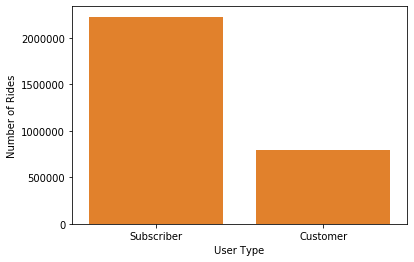

In [69]:
#Number of rides by user type
base_color = sb.color_palette()[0] 
sb.countplot(data = df2, x= "user_type", color=base_color);
plt.xlabel('User Type')
plt.ylabel('Number of Rides');

In [37]:
df.bike_id.nunique()

14382

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The range of values for the duration of the rides is quite big, ranging from 6 seconds to more than 900000 seconds (~2500 hours, ~104 days). However, the peak seems to be between 1h and 2h.

> There are two types of costumers: subscribers and non-subscribers/"customer"

> There are two ways of renting a bike: App or Clipper

> According to the data, there are 14382 bikes in this bikesharing system

> The most common trajectory is from Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza) (4697 rides), followed by from San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St (4617 rides).

> The most popular station is San Francisco Caltrain (Townsend St at 4th St), with 57994 rides ending there and 44977 starting there.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> I converted bike_id, start_station_id and end_station_id to strings and start_time and end_time to datetime. I also split the start_time into hour, day of the week and year. I'll base most of the analysis regarding times on the start time of the ride.  

> I created a new column with ride duration in hours, so that is easier to interpret (than seconds). I also calculated distances betweent start station and end station. Of course, that doesn't mean that that was the total distance of the ride, but gives us an idea of how far the customer went. For some stations, latitude and longitude data is not correct leading to wrong distances. I ignored these when analysing distances. 

> The duration for some rides is quite high. We're trying to understand the utilization of the bikes and some people might actually keep them for longer periods, it doesn't necessarily mean that the data is wrong. If we notice that too many people are keeping their bikes for long periods, the company might want to create a new strategy for these customers. However, this doesn't seem the case, as these cases represent a very small percentage of all rides, so I excluded them (excluded rides longer than 17 hours). I did the same for distance - excluded rides of more than 10km. 

> Considering the start time of the rides, the most "busy" times are in the morning (between 7am and 9am) and in the afternoon (between 4pm and 6pm). Weekdays seem to be the busiest, confirming my expectations. The busiest months, this is, the months with a higher number of rides are February and March. 

> The number of subscribers' rides is more than twice the number of rides of customers that are not subscribers. 

## Bivariate Exploration

In this section, I'll focus on user types.

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020161 entries, 11 to 3036495
Data columns (total 21 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
 15  duration_hour            float64       
 16  year                     int64         
 17  month                    i

Text(0, 0.5, 'Ride Duration (hour)')

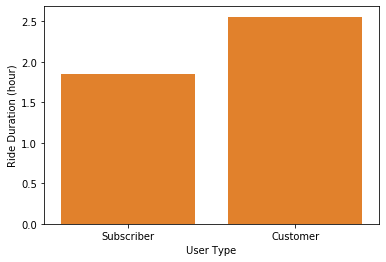

In [135]:
g = sb.barplot(data = df2, x = 'user_type', y = 'duration_hour', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Ride Duration (hour)');

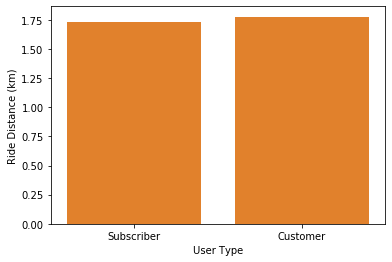

In [136]:
g = sb.barplot(data = df2, x = 'user_type', y = 'distance', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Ride Distance (km)');

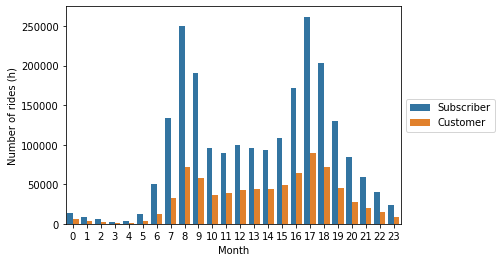

In [150]:
ax = sb.countplot(data = df2, x = 'hour', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'User Type')
plt.xlabel('Time of the day (hour)')
plt.ylabel('Number of rides')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

No handles with labels found to put in legend.
No handles with labels found to put in legend.


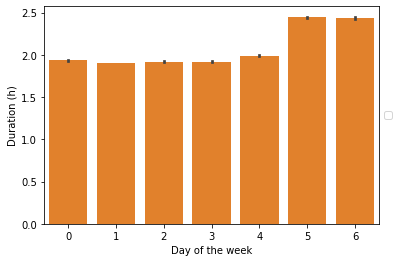

In [155]:
ax = sb.barplot(data = df2, x = 'day_week', y= 'duration_hour', color=base_color1)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'User Type')
plt.xlabel('Day of the week')
plt.ylabel('Duration (h)')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Although the travelled distance for both user types is similar, the averge duration of the ride is higher for Customers (non subscribers). I would say that customers/non-subscribers use these bikes more for leisure. Furthermore, not being a subscriber might indicate that they are tourists or, at least, don't live in San Francisco. This might justify the difference in average ride durations:
    - subscribers are people who work and use these bikes as a means of transportation
    - non subscribers includes tourists, that use bikes for sightseeing (and probably stop at some places), increasing the duration of the ride although the distance is not significantly higher 
    
> Subscribers are the main contributers for the peak of number of rides during rush hour. This reinforces my view that subscribers are probably mostly commuters. 

> On weekends, ride durations are longer. Maybe because people are just enjoying the ride an not rushing to work.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Interestingly, average distance is higher for customers than for subscribers. One the one hand, I would expect Customers to use these bikes more for one-off situations, thus shorter distances. However, if we think that most of them might be tourists, it might actually make sense that average distance is slightly higher than for subscribers, as they might spend, for example, an entire day sightseeing, and travel a longer distance. 

> I wouldn't expect the variation of the number of rides during the day for customers to be so similar to those of subscribers (with less amplitude though)

## Multivariate Exploration

> Next, I will investigate possible relationships between user type, ride duration/distance and month/hour/day of week

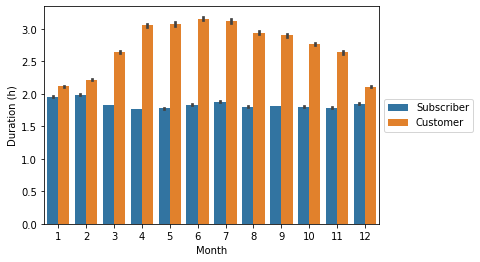

In [139]:
ax = sb.barplot(data = df2, x = 'month', y = 'duration_hour', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'User Type')
plt.xlabel('Month')
plt.ylabel('Duration (h)')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

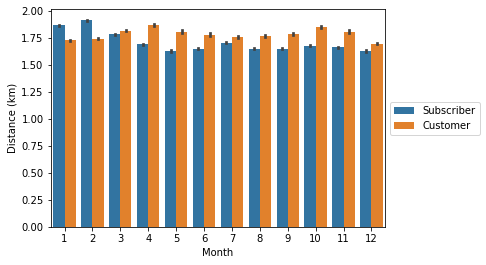

In [140]:
#Multi
ax = sb.barplot(data = df2, x = 'month', y = 'distance', hue = 'user_type', dodge=0.3)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'User Type')
plt.xlabel('Month')
plt.ylabel('Distance (km)')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

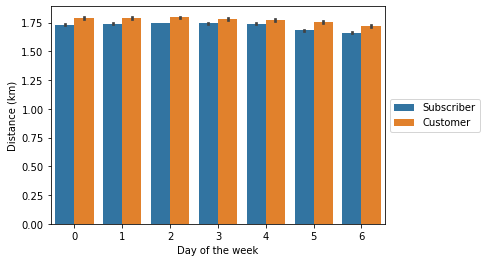

In [142]:
ax = sb.barplot(data = df2, x = 'day_week', y = 'distance', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'User Type');
plt.xlabel('Day of the week')
plt.ylabel('Distance (km)')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

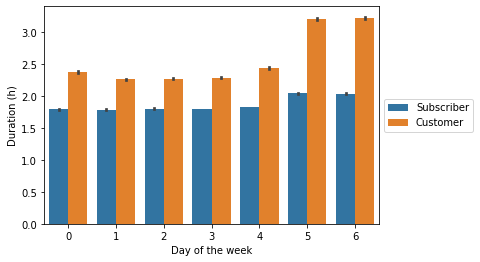

In [143]:
ax = sb.barplot(data = df2, x = 'day_week', y = 'duration_hour', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'User Type')
plt.xlabel('Day of the week')
plt.ylabel('Duration (h)')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Regaring ride duration, this seems to be quite constant throughout the year for subscribers (probably commuters who use the bikes for the same journey every day). For customers, duration increases, reaching a peak between April and August. I believe that as weather gets better, people who use these bikes for leisure tend to enjoy a longer ride. Curiously, average distance for Customers seems to very slightly decrease between April and August. Maybe they are more relaxed, stop by a park and get some sun.

> The ride distance and duration for subscribers is quite stable throughout the week. For customers, average duration increases by about one hour on weekends. 

### Were there any interesting or surprising interactions between features?

> Yes, I would expect subscribers to use this service more on the weekends too.
It is also surprising that the months with the highest number of rides are January, February and March as those are the coldest